# Lagos Public Transportation Classification witth AI
___

The aim of this project is to build an application that can correctly classify four main types of public transportation in Lagos state, Nigeria. These vehicles include

* Bus Rapid Transit (BRT)

    *   <img src="data/brt/brt161.jpeg" alt="BRT Bus" style="height: 300px; width:500px;"/> 

<br />

* Danfo / Bus

    *   <img src="data/danfo/danfobus30.jpeg" alt="Danfo Bus" style="height: 300px; width:500px;"/> 

<br />

* Keke Napep / Keke Maruwa / Keke Tricycle

    *   <img src="data/keke/kekenapep220.jpeg" alt="Keke Napep" style="height: 300px; width:500px;"/> 


<br />

* Okada Bike / Motorcycle

    *   <img src="data/okada/okadabike13.jpeg" alt="Okada Bike" style="height: 300px; width:500px;"/> 

___
The data was scraped using the [Google Image Scraper](https://github.com/ohyicong/Google-Image-Scraper) tool to extract all the images from Google

### Import Libraries

In [1]:
from tensorflow import keras #deep learning framework
from tensorflow.keras import layers 

Import the data

In [2]:
import pathlib # library to access directory

In [3]:
directory = "data/" # dir holding data
directory = pathlib.Path(directory) # accessing dir
directory

WindowsPath('data')

In [4]:
len(list(directory.glob("*/*"))) # list total number of files in dir

1512

In [5]:
brt = list(directory.glob("brt/*")) #dir holding brt images
brt[:10]

[WindowsPath('data/brt/brt0.jpeg'),
 WindowsPath('data/brt/brt1.jpeg'),
 WindowsPath('data/brt/brt100.jpeg'),
 WindowsPath('data/brt/brt101.jpeg'),
 WindowsPath('data/brt/brt102.jpeg'),
 WindowsPath('data/brt/brt104.jpeg'),
 WindowsPath('data/brt/brt105.jpeg'),
 WindowsPath('data/brt/brt106.jpeg'),
 WindowsPath('data/brt/brt107.jpeg'),
 WindowsPath('data/brt/brt108.jpeg')]

Display Image

In [6]:
import PIL # library that display image

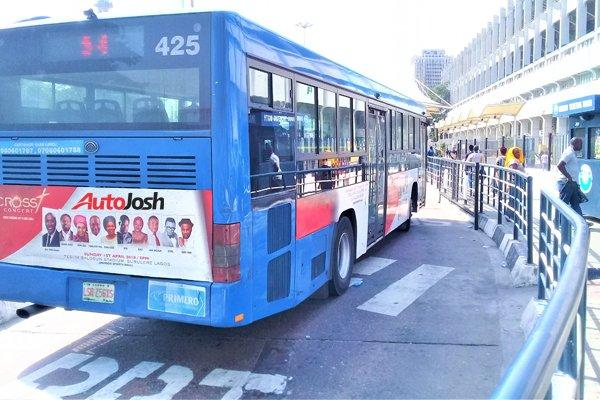

In [7]:
PIL.Image.open(str(brt[5]))

In [8]:
keke = list(directory.glob("keke/*"))
keke[:10]

[WindowsPath('data/keke/danfo335.jpeg'),
 WindowsPath('data/keke/danfobus262.jpeg'),
 WindowsPath('data/keke/kekenapep0.jpeg'),
 WindowsPath('data/keke/kekenapep1.jpeg'),
 WindowsPath('data/keke/kekenapep10.png'),
 WindowsPath('data/keke/kekenapep101.jpeg'),
 WindowsPath('data/keke/kekenapep102.jpeg'),
 WindowsPath('data/keke/kekenapep103.jpeg'),
 WindowsPath('data/keke/kekenapep105.jpeg'),
 WindowsPath('data/keke/kekenapep106.jpeg')]

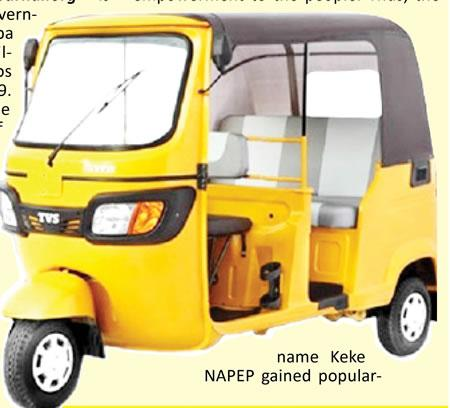

In [9]:
PIL.Image.open(str(keke[2]))

### Data Preprocessing

Folder and Label Handling

In [10]:
# Storing image folders in a dictionary
transport_images = {
    "brt" : list(directory.glob("brt/*")),
    "danfo" : list(directory.glob("danfo/*")),
    "keke" : list(directory.glob("keke/*")),
    "okada" : list(directory.glob("okada/*")),
}

In [11]:
# creating and storing labels for each class
transport_labels = {
    "brt" : 0,
    "danfo" : 1,
    "keke" : 2,
    "okada" : 3,
}

converting images to tensors

In [12]:
import cv2 #library that'll convert image to tensor

In [13]:
img = cv2.imread(str(transport_images["brt"][0]))
img

array([[[253, 251, 243],
        [253, 251, 243],
        [251, 251, 245],
        ...,
        [255, 242, 236],
        [251, 241, 234],
        [254, 246, 239]],

       [[254, 252, 244],
        [253, 251, 243],
        [251, 248, 243],
        ...,
        [179, 167, 161],
        [181, 173, 166],
        [192, 186, 179]],

       [[183, 181, 171],
        [182, 181, 171],
        [184, 182, 174],
        ...,
        [ 56,  47,  43],
        [ 59,  55,  50],
        [ 78,  75,  70]],

       ...,

       [[238, 221, 212],
        [228, 213, 204],
        [220, 204, 197],
        ...,
        [170, 171, 175],
        [178, 179, 183],
        [188, 189, 193]],

       [[232, 215, 206],
        [217, 202, 193],
        [212, 196, 189],
        ...,
        [162, 163, 167],
        [164, 165, 169],
        [171, 172, 176]],

       [[226, 209, 200],
        [209, 194, 185],
        [206, 190, 183],
        ...,
        [166, 167, 171],
        [175, 176, 180],
        [186, 187, 191]]

Storing tensors into X and y data

In [14]:
X, y = [], [] # initializing X, y data in lists
null = []

for transport_name, images in transport_images.items():
    for image in images:
        img = cv2.imread(str(image)) # get path of image
        try:
            img = cv2.resize(img, (224, 224)) # convert into tensor of 224 * 224 pixels
            X.append(img) # store tensor in X data
            y.append(transport_labels[transport_name]) # store label in y data
        except:
            null.append(img) # if image is corrupted remove                    

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
X = np.array(X) # convert into numpy array
y = np.array(y)

Data Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=767, stratify=y, test_size=0.2)

In [18]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=121, stratify=y_train, test_size=0.1) # for validation

In [19]:
# X_train.shape, X_test.shape , X_val.shape
X_train.shape, X_test.shape

((1208, 224, 224, 3), (302, 224, 224, 3))

Normalize data /Scaling

In [20]:
X_train = X_train / 255
# X_val = X_val / 255
X_test = X_test / 255

### Model Building

Convolution Neural Network

In [21]:
model = keras.Sequential([
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(4, activation="softmax"),
])

model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
19/19 [==============================] - 20s 1s/step - loss: 4.6525 - accuracy: 0.4056
Epoch 2/10
19/19 [==============================] - 20s 1s/step - loss: 1.0330 - accuracy: 0.5604
Epoch 3/10
19/19 [==============================] - 21s 1s/step - loss: 0.8508 - accuracy: 0.6829
Epoch 4/10
19/19 [==============================] - 21s 1s/step - loss: 0.6438 - accuracy: 0.7765
Epoch 5/10
19/19 [==============================] - 20s 1s/step - loss: 0.4250 - accuracy: 0.8825
Epoch 6/10
19/19 [==============================] - 21s 1s/step - loss: 0.3325 - accuracy: 0.8998
Epoch 7/10
19/19 [==============================] - 20s 1s/step - loss: 0.2544 - accuracy: 0.9214
Epoch 8/10
19/19 [==============================] - 21s 1s/step - loss: 0.1901 - accuracy: 0.9421
Epoch 9/10
19/19 [==============================] - 21s 1s/step - loss: 0.0630 - accuracy: 0.9967
Epoch 10/10
19/19 [==============================] - 21s 1s/step - loss: 0.1484 - accuracy: 0.9702


Model Evaluation

In [22]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 2s 152ms/step - loss: 0.8650 - accuracy: 0.7219


[0.8649635314941406, 0.7218543291091919]

In [23]:
predictions = model.predict(X_test)
predictions = [value.argmax() for value in predictions]

10/10 [==============================] - 2s 146ms/step


In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

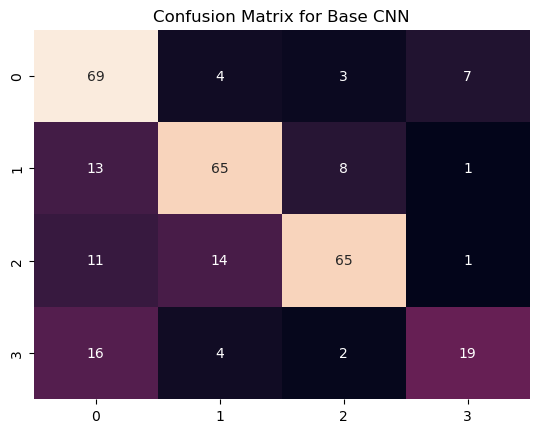

In [25]:
plt.title("Confusion Matrix for Base CNN")
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);

Data Augmentation

In [26]:
data_augmentation = keras.Sequential([
    layers.RandomFlip(input_shape=(224, 224, 3)),
    layers.RandomRotation(0.9),
    layers.RandomZoom(0.2),
])

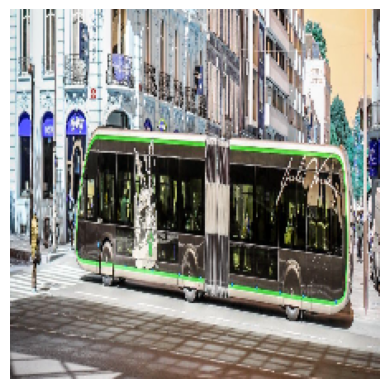

In [27]:
plt.axis("off")
plt.imshow(X[29])

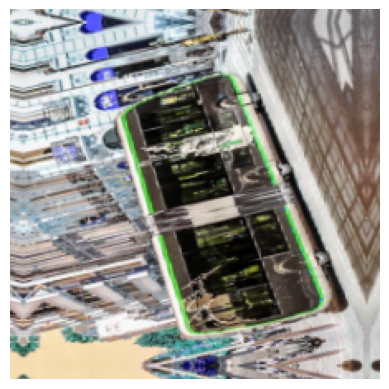

In [28]:
plt.axis("off")
plt.imshow(data_augmentation(X)[29].numpy().astype("uint8"))

Data Augmentation CNN

In [29]:
modelx = keras.Sequential([
    data_augmentation,
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(4, activation="softmax"),
])

modelx.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy", metrics=["accuracy"])
modelx.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
19/19 [==============================] - 26s 1s/step - loss: 3.1624 - accuracy: 0.3833
Epoch 2/10
19/19 [==============================] - 52s 3s/step - loss: 1.1309 - accuracy: 0.4892
Epoch 3/10
19/19 [==============================] - 38s 2s/step - loss: 1.0992 - accuracy: 0.4959
Epoch 4/10
19/19 [==============================] - 24s 1s/step - loss: 1.1454 - accuracy: 0.5058
Epoch 5/10
19/19 [==============================] - 24s 1s/step - loss: 1.0759 - accuracy: 0.5257
Epoch 6/10
19/19 [==============================] - 24s 1s/step - loss: 1.0468 - accuracy: 0.5265
Epoch 7/10
19/19 [==============================] - 24s 1s/step - loss: 1.0896 - accuracy: 0.5339
Epoch 8/10
19/19 [==============================] - 24s 1s/step - loss: 1.0579 - accuracy: 0.5240
Epoch 9/10
19/19 [==============================] - 24s 1s/step - loss: 1.0548 - accuracy: 0.5315
Epoch 10/10
19/19 [==============================] - 24s 1s/step - loss: 1.0692 - accuracy: 0.5712


In [30]:
modelx.evaluate(X_test, y_test)

10/10 [==============================] - 1s 139ms/step - loss: 0.9920 - accuracy: 0.6026


[0.9920283555984497, 0.6026490330696106]

In [31]:
predictions = modelx.predict(X_test)
predictions = [value.argmax() for value in predictions]

10/10 [==============================] - 1s 143ms/step


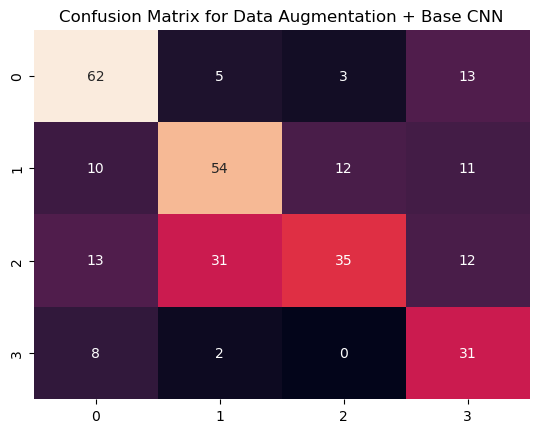

In [32]:
plt.title("Confusion Matrix for Data Augmentation + Base CNN")
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);

### Transfer learning

In [33]:
import tensorflow_hub as hub #library to access pretrained models

Mobilenet V2 model with no output layer (feature vector)

Getting pretrained model and removing it's output layer(layer used to predict) so we can create a custom model

In [34]:
pretrainer = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape = (224, 224, 3),
    trainable=False), #freezing
])

Pre-trained model fine-tuning

In [35]:
for layer in pretrainer.layers[:100]: # removing some layers used for prediction
    layer.trainable = False


In [36]:
model = keras.Sequential([
    pretrainer,
    layers.Dropout(0.4), 
    layers.Dense(4, activation="softmax"),
])
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
38/38 [==============================] - 16s 342ms/step - loss: 0.8606 - accuracy: 0.6705
Epoch 2/20
38/38 [==============================] - 13s 345ms/step - loss: 0.4052 - accuracy: 0.8609
Epoch 3/20
38/38 [==============================] - 13s 345ms/step - loss: 0.3069 - accuracy: 0.8891
Epoch 4/20
38/38 [==============================] - 13s 351ms/step - loss: 0.2696 - accuracy: 0.8990
Epoch 5/20
38/38 [==============================] - 13s 351ms/step - loss: 0.2406 - accuracy: 0.9139
Epoch 6/20
38/38 [==============================] - 14s 357ms/step - loss: 0.1987 - accuracy: 0.9321
Epoch 7/20
38/38 [==============================] - 13s 347ms/step - loss: 0.1714 - accuracy: 0.9429
Epoch 8/20
38/38 [==============================] - 13s 345ms/step - loss: 0.1428 - accuracy: 0.9570
Epoch 9/20
38/38 [==============================] - 13s 345ms/step - loss: 0.1439 - accuracy: 0.9495
Epoch 10/20
38/38 [==============================] - 13s 345ms/step - loss: 0.1473 - accura

In [37]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 4s 337ms/step - loss: 0.1888 - accuracy: 0.9371


[0.18876397609710693, 0.9370861053466797]

In [38]:
predictions = model.predict(X_test)
predictions = [value.argmax() for value in predictions]

10/10 [==============================] - 4s 323ms/step


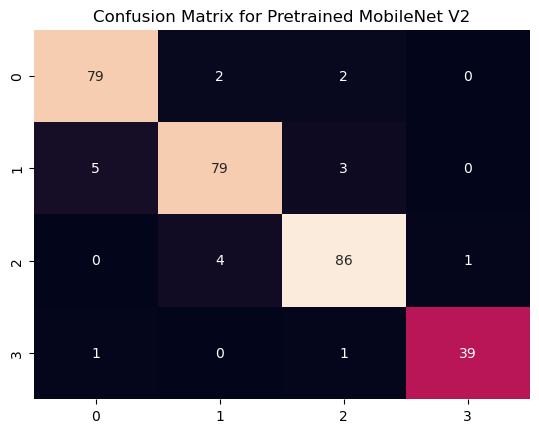

In [39]:
plt.title("Confusion Matrix for Pretrained MobileNet V2")
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);

Test Prediction

In [90]:
pred = list(directory.glob("test/*"))
pred

[WindowsPath('data/test/1.jpg'),
 WindowsPath('data/test/Screenshot_20220402-013857_Twitter.jpg'),
 WindowsPath('data/test/test.jpg'),
 WindowsPath('data/test/test2.jpg'),
 WindowsPath('data/test/test3.jpg'),
 WindowsPath('data/test/test4.jpg'),
 WindowsPath('data/test/test5.jpg')]

In [96]:
def predict(image):
    
    img = cv2.imread(str(pred[image]))
    img = cv2.resize(img, (224, 224))

    test = np.array(img)
    test = test / 255

    x = np.reshape(test, (1, 224, 224, 3))
    x = model.predict(x)
    prediction = x.argmax() 
    probabilty = x[0].max() * 100
    return prediction, probabilty

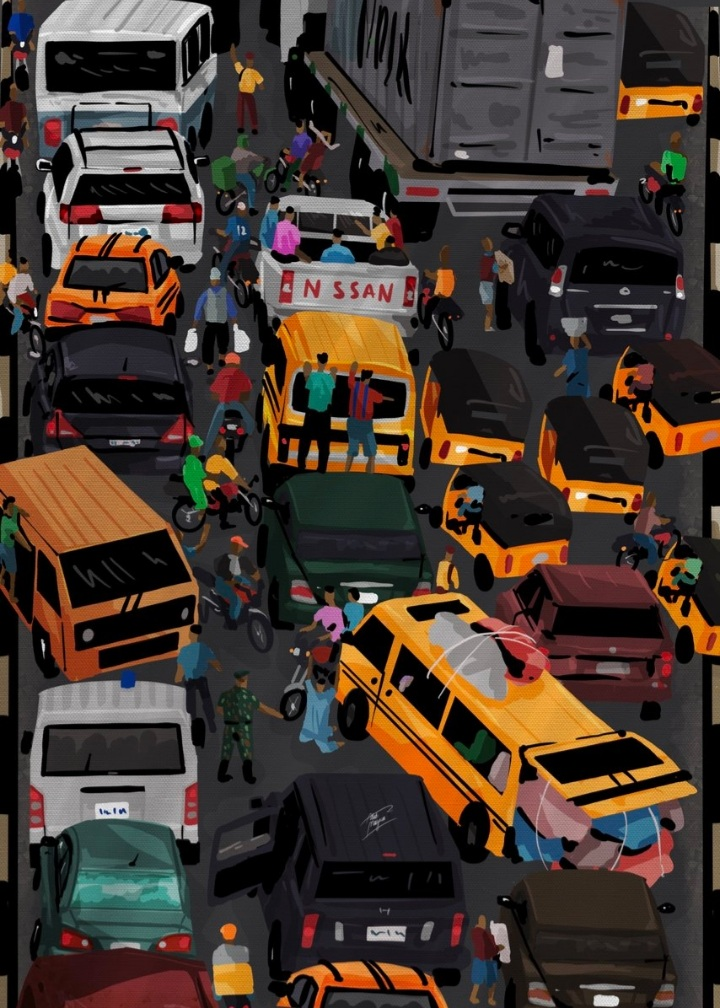

In [91]:
PIL.Image.open(str(pred[1]))

In [97]:
predict(1)

1/1 [==============================] - 0s 49ms/step


(1, 99.7540831565857)

Save Model

In [64]:
model.save("final_model.h5")